# What is customer churn?
The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("telecom_users.csv")

In [4]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [5]:
'''
COLUMN INFORMATION
------------------

customerID - customer id
gender     - client gender (male / female)
SeniorCitizen - is the client retired (1, 0)
Partner - is the client married (Yes, No)
tenure - how many months a person has been a client of the company
PhoneService - is the telephone service connected (Yes, No)
MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
InternetService - client's Internet service provider (DSL, Fiber optic, No)
OnlineSecurity - is the online security service connected (Yes, No, No internet service)
OnlineBackup - is the online backup service activated (Yes, No, No internet service)
DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
TechSupport - is the technical support service connected (Yes, No, No internet service)
StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
Contract - type of customer contract (Month-to-month, One year, Two year)
PaperlessBilling - whether the client uses paperless billing (Yes, No)
PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges - current monthly payment
TotalCharges - the total amount that the client paid for the services for the entire time
Churn - whether there was a churn (Yes or No)

''';

In [6]:
# In the above dataframe 'Unnamed: 0' is the unrequired column so we will drop it
df.drop(columns = ["Unnamed: 0"], inplace=True)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# OVERALL STUDY OF THE DATA

In [8]:
# Here we will check all the columns and their datatypes. We will also see here if we need to change the datatype of any column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [9]:
# Here we will check for presence of anomalies withing the Data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


## Important Observations
1. Here we see that there are certain customers who have tenure of 0 as well which probably means that it has not even been one month that they have joined the service

In [10]:
# Now we will check if there are any null values withing the Data
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### We see that there are no NaN values in the data

In [11]:
# We should also see if there are any blank spaces within the data
df1 = df.select_dtypes('object')
for i in df1.columns:
    bs = df1[i].str.isspace().sum()
    print(i, bs)


customerID 0
gender 0
Partner 0
Dependents 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
TotalCharges 10
Churn 0


In [12]:
df[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [13]:
df[df["tenure"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [14]:
df2 = df.select_dtypes(include= ['float64', 'int64'])
for i in df2.columns:
    bs = df2[i].astype('str').str.isspace().sum()
    print(i, bs)

SeniorCitizen 0
tenure 0
MonthlyCharges 0


### We see here that there are blank spaces in the TotalCharges column but these spaces belong to people who have 0 as their tenure which means that their MonthlyCharges equal to the TotalCharges.

In [15]:
# Checking if there are any duplicate rows in the data
df.drop(columns = ["customerID"]).duplicated().sum()

16

### We see that there are 16 duplicate rows so since it is a small number so we can drop these rows. 

# TREATMENT FOR BLANK SPACES AND DUPLICATE ROWS

In [16]:
# Treating the data for blank spaces in TotalCharges column
# For the treatment we need to replicate the values of MonthlyCharges to the TotalCharges

In [17]:
df[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [18]:
df1 = df[df["TotalCharges"]== " "]

In [19]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No


In [20]:
indexes = df1.index.tolist()

In [21]:
df1.loc[:,"TotalCharges" ] = df1.loc[:, "MonthlyCharges"]

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [22]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,61.90,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No


In [23]:
df.loc[indexes, "TotalCharges"] = df1.loc[indexes, "TotalCharges"]

In [24]:
df[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Thus we see that blank values have been treated

### -----------------------------------------------------------------------------------------------------

In [25]:
# Now we will treat the duplicate rows
df.drop(columns = ["customerID"]).duplicated().sum()

16

#### We see that there are 16 duplicate rows

In [26]:
(df.drop(columns = ["customerID"]).duplicated().sum()/df.shape[0])*100

0.2672903441363181

#### We see above that only 0.26% rows are duplicate so we can drop them

In [27]:
df2 = df.drop(columns = ["customerID"]).drop_duplicates()

In [28]:
df2["customerID"] = df.loc[df2.index.tolist(), "customerID"]

In [29]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,7010-BRBUU
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No,9688-YGXVR
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,9286-DOJGF
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No,6994-KERXL
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No,2181-UAESM


In [30]:
df= df2.copy()

In [31]:
df.drop(columns = ["customerID"]).duplicated().sum()

0

### we see that duplicate rows have been deleted

# VARIABLE ANALYSIS

### In this section we will do analysis of all the variables one by one.
### Univariate, Bivariate and Multivariate analysis will all be carried out simultaneously and observations will be recorded.

In [32]:
# We will be putting is use the below function 
def vis_cat(A,n):
    '''This function takes a categorical valriable and visualise its categories 
       and values for the given font size n.
    '''
    df_v = pd.DataFrame(A.value_counts(dropna = False))
    df_v.reset_index(inplace = True)
    
    df_v.rename(columns = {df_v.columns[0]:"column_name", df_v.columns[1]:"value"}, inplace= True)
    
    plt.figure(figsize = (n,n))
    plt.xticks(rotation = 90)
    
    for i, v in enumerate(A.value_counts(dropna = False).values.tolist()):
        plt.text(i,v,str(v), fontsize = 20)
   
    
    
    return plt.bar(df_v["column_name"], df_v["value"]) 

In [33]:
def vis_cat_perc(A,n):
    '''This function takes a categorical valriable and visualise its categories 
       and values for the given font size n.
    '''
    df_v = pd.DataFrame(A.value_counts(dropna = False))
    df_v.reset_index(inplace = True)
    
    df_v.rename(columns = {df_v.columns[0]:"column_name", df_v.columns[1]:"value"}, inplace= True)
    

    list1 = list(df_v["value"])
    tot_sum = sum(list1)
    
    percentages = []
    for i in list1:
        p = round((i/tot_sum)*100, 2)
        percentages.append(p)
    
    df_v["Percentages"] = percentages
    
    plt.figure(figsize = (n,n))
    plt.xticks(rotation = 90)
    
    for i, v in enumerate(df_v["Percentages"].tolist()):
        plt.text(i,v,str(v)+'%', fontsize = 20)
   
    
    
    return plt.bar(df_v["column_name"], df_v["Percentages"]) 

In [34]:
 
def vis_cat_tar(a,t,n):
    '''This function takes a categorical valriable a and the target variable t visualise its categories 
       aggregated over the target for the given font size n.
    '''
    df_t = df.groupby(a).agg({t: "sum"})
    df_t.reset_index(inplace = True)
    
    df_t.rename(columns = {df_t.columns[0]:"column_name", df_t.columns[1]:"value"}, inplace= True)
    
    plt.figure(figsize = (n,n))
    plt.xticks(rotation = 90)
    

    for i,v in enumerate(df_t["value"].tolist()):
        plt.text(i,v,str(v), fontsize=20)
    
    
   
   
    
    
    return plt.bar(df_t["column_name"], df_t["value"]) 

In [35]:
def vis_perc(A, a, t, n):
    df_t = df.groupby(a).agg({t: "sum"})
    df_t.reset_index(inplace = True)
    
    df_t.rename(columns = {df_t.columns[0]:"column_name", df_t.columns[1]:"value"}, inplace= True)
    
    
    
    df_v = pd.DataFrame(A.value_counts(dropna = False))
    df_v.reset_index(inplace = True)
    
    df_v.rename(columns = {df_v.columns[0]:"column_name", df_v.columns[1]:"value1"}, inplace= True)
    
    
    df_n = pd.merge(df_t, df_v, on = "column_name")
    
    
    Percentage = []
    for i,j in zip(df_n["value"].tolist(), df_n["value1"].tolist()):
        p = (i/j)*100
        Percentage.append(round(p,2))
    
    df_f = pd.DataFrame(Percentage)
    df_f.rename(columns = {0:"Percentage"}, inplace = True)
    df_f["Categories"] = df_n["column_name"]
    
    plt.figure(figsize = (n,n))
    plt.xticks(rotation = 90)
  
    
    
    for i,v in enumerate(df_f["Percentage"].tolist()):
        plt.text(i,v, str(v)+'%', fontsize = 20)
        
    

        
    return plt.bar(df_f["Categories"], df_f["Percentage"])

## gender

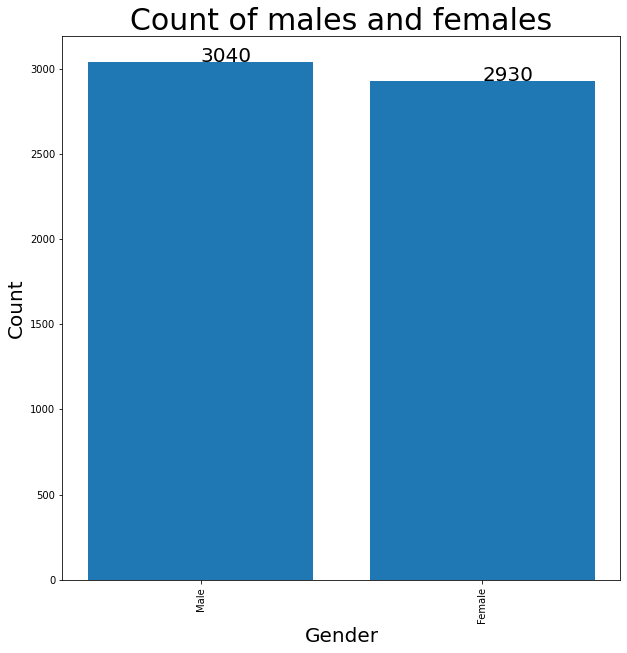

In [36]:
# first of all we will see how many males and females are there in our data.

vis_cat(df["gender"], 10)
plt.xlabel("Gender", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Count of males and females", fontsize = 30)
plt.show()


#### Here we find that there is not much difference in the number of males and females in our data

In [37]:
# Now we will see from how many males and females have churned

In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,7010-BRBUU
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No,9688-YGXVR
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,9286-DOJGF
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No,6994-KERXL
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No,2181-UAESM


In [39]:
df["Churn_n"] = df["Churn"].replace(["Yes","No"], [1,0])

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID,Churn_n
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,7010-BRBUU,0
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No,9688-YGXVR,0
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,9286-DOJGF,1
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No,6994-KERXL,0
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No,2181-UAESM,0


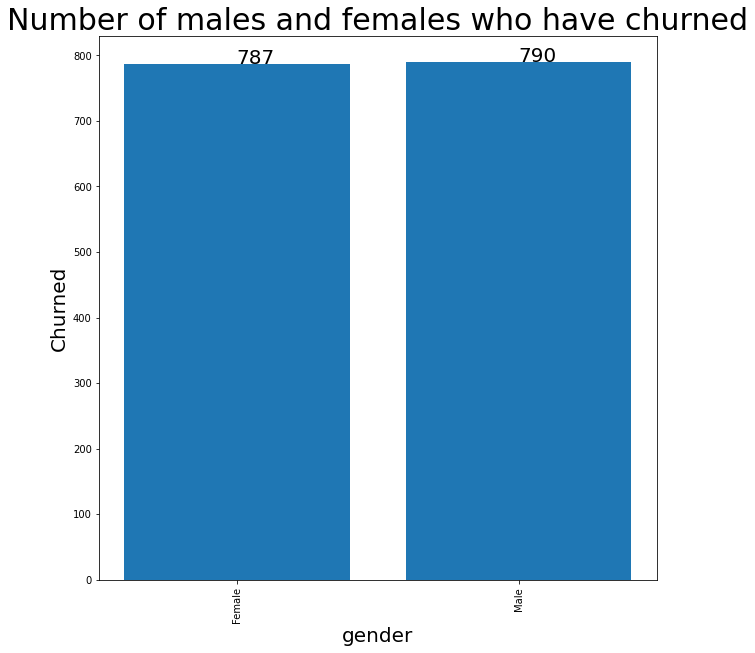

In [41]:
vis_cat_tar("gender", "Churn_n", 10)
plt.xlabel("gender", fontsize = 20)
plt.ylabel("Churned", fontsize = 20)
plt.title("Number of males and females who have churned", fontsize = 30)
plt.show()

#### We see here that number of Males and Females who have churned are almost the same so we can say that gender is not affecting the churn by much

## Important Observations From gender
1. There is not much difference in the number of males and females in our data
2. Number of females churning is almost equal to number of males who have chuned so gender is not affecting churn

## SeniorCitizen

In [42]:
# First thing to do for a Nominal Target variable is to replace label encodings with the category name
df["SeniorCitizen"].replace([1,0], ['Yes', 'No'], inplace=True)

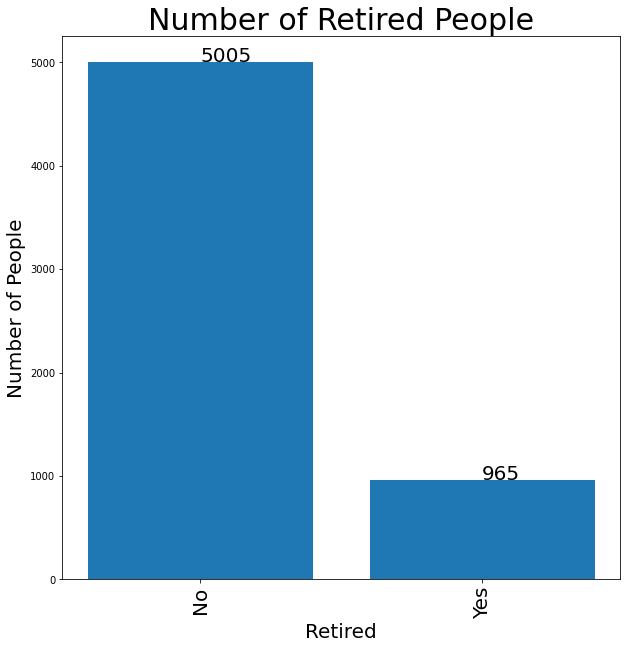

In [43]:
# Now we will see how many people in our data are retired and how many are not retired
vis_cat(df["SeniorCitizen"], 10)
plt.xticks(fontsize = 20)
plt.xlabel("Retired", fontsize = 20)
plt.ylabel("Number of People", fontsize = 20)
plt.title("Number of Retired People", fontsize = 30)
plt.show()

#### We see above that there are 5005 peple in our dataset who are not retired and 965 people who are retired.
#### Thus number of retired people are nearly 1/5th of the not retired people

<BarContainer object of 2 artists>

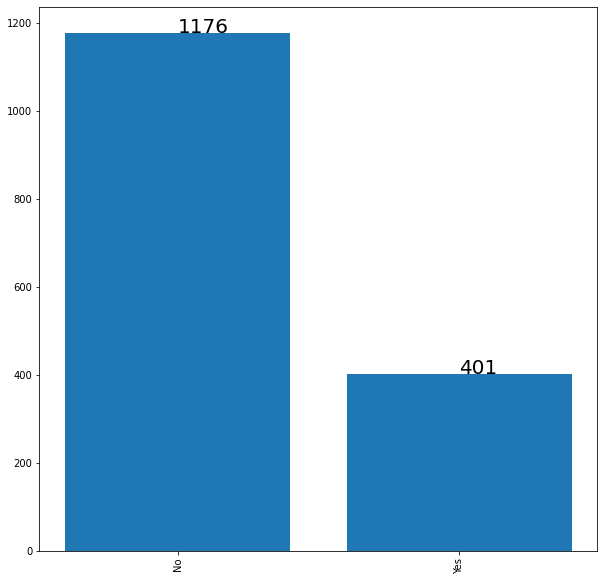

In [44]:
# Here we will see number of retired and not retired people who churned

vis_cat_tar("SeniorCitizen", "Churn_n", 10)


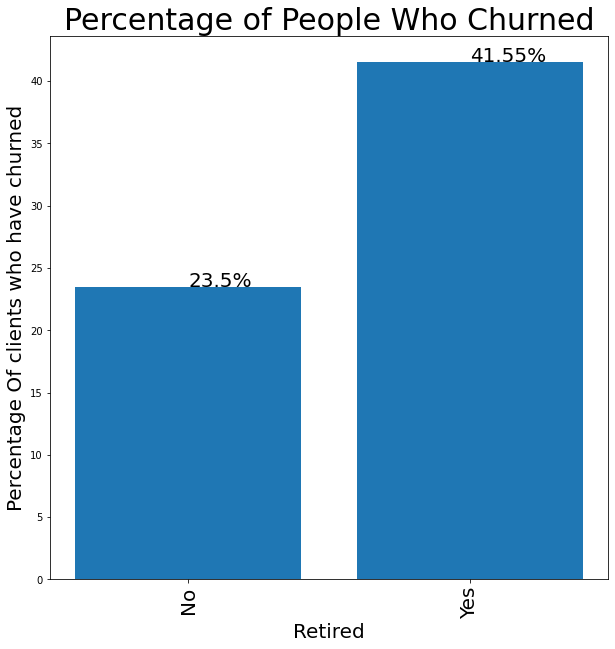

In [45]:
# Now we will see the percentage of retired and not retired people who churned
vis_perc(df["SeniorCitizen"], "SeniorCitizen", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.xlabel("Retired", fontsize = 20)
plt.ylabel("Percentage Of clients who have churned", fontsize = 20)
plt.title("Percentage of People Who Churned", fontsize = 30)
plt.show()

#### We see that about 23% of the people who are not retired have churned and about 41% of the people who are retired have churned
#### This shows that greater proportion of retired people have churned compared to the not retired people

<p>&nbsp;</p>

#### What can be the prabable reasons of retired people churning more?
One probable reason can be that some of the customers who are retired might have died

### Important Observations from SeniorCitizen
1. Number of retired people are nearly 1/5th of the not retired people.
2. About 23% of the people who are not retired have churned and about 41% of the people who are retired have churned. 


# Partner

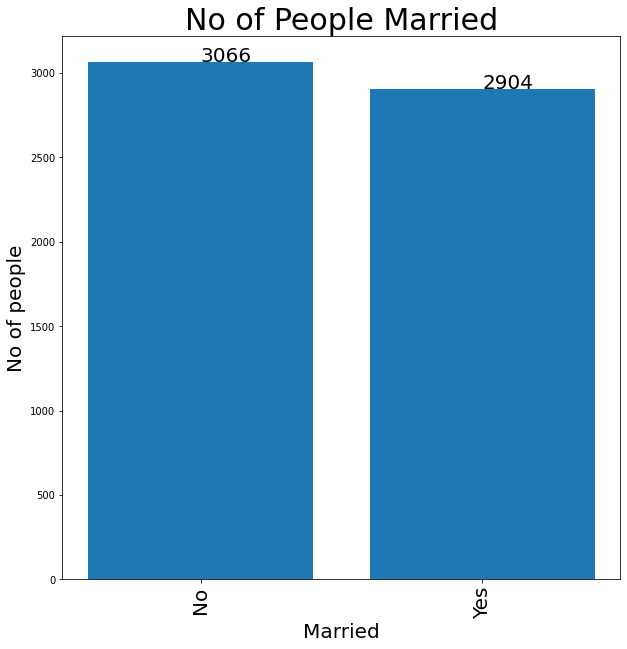

In [46]:
# First of all we will see how many people are married and how many are not in our dataset
vis_cat(df["Partner"], 10)
plt.xticks(fontsize= 20)
plt.xlabel("Married", fontsize = 20)
plt.ylabel("No of people", fontsize = 20)
plt.title("No of People Married", fontsize = 30)
plt.show()

#### Thus there is not much difference between number of married and not married people in our dataset

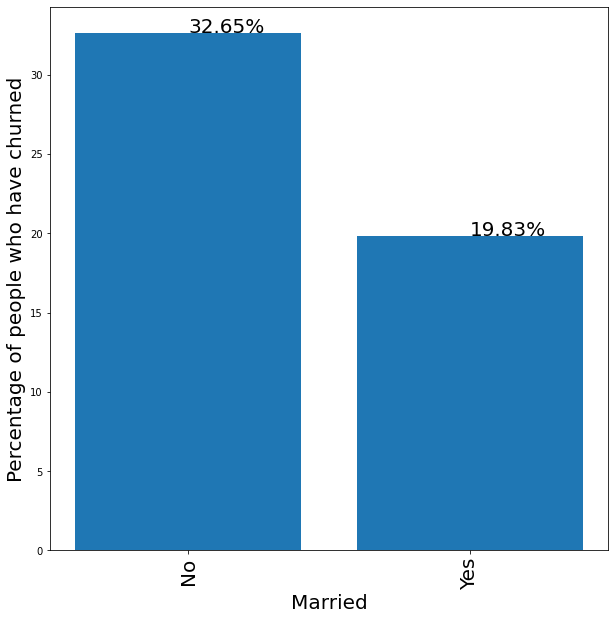

In [47]:
# Now we will see what % of married and not married people have churned
vis_perc(df["Partner"], "Partner", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.xlabel("Married", fontsize = 20)
plt.ylabel("Percentage of people who have churned", fontsize = 20)
plt.show()

#### We see here that about 20% of Married people have churned and about 32% of not married people have churned.
#### People who are not married have churned more than the married people

<p>&nbsp;</p>

One probable reason of why people who are not married have churned more is that bachelors tend to try new companies with more enthusiasm than the married people.

### Important Observations from SeniorCitizen

1. There is not much difference between number of married and not married people in our dataset.
2. We see here that about 20% of Married people have churned and about 32% of not married people have churned.


# tenure

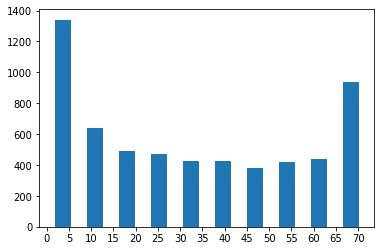

In [48]:
plt.hist(df["tenure"], rwidth = 0.5)
plt.xticks(ticks = np.arange(0,71,5))
plt.show()

#### We see that most populated category is of low tenue clients followed by very high tenure clients followed by medium tenure clients

In [49]:
plt.hist?

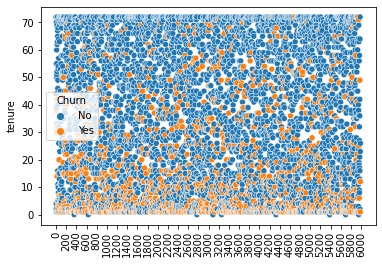

In [50]:
# Now we would want to know if customer churn was higher for the low tenure or high tenure clients
sns.scatterplot(x = df.index, y= df['tenure'], hue = df["Churn"])
plt.xticks(ticks = np.arange(0,6001, 200), rotation = 90)
plt.show()


#### From the abpove graph we are able to see that churn is most among the clients with lower tenure. So we can say that long term clients do not churn much

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

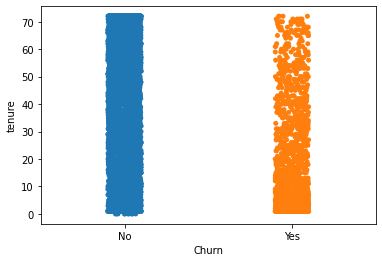

In [51]:
sns.stripplot(x = df["Churn"], y = df["tenure"])

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

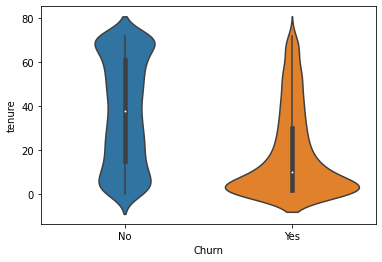

In [52]:
sns.violinplot(x = df["Churn"], y = df["tenure"])

#### From the above plot also we can see that churn was majorly among low tenure clients

In [53]:
# We will now try to remove outliers from the column 
np.percentile(df["tenure"], range(1,101))

array([ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  2.  ,
        2.  ,  2.  ,  3.  ,  3.  ,  3.  ,  4.  ,  4.  ,  4.  ,  5.  ,
        6.  ,  6.  ,  7.  ,  7.  ,  8.  ,  8.  ,  9.  , 10.  , 10.  ,
       11.  , 11.  , 12.  , 13.  , 13.  , 14.  , 15.  , 16.  , 17.  ,
       18.  , 18.  , 19.  , 20.  , 21.  , 22.  , 23.  , 24.  , 24.  ,
       25.  , 26.  , 27.  , 28.  , 29.  , 30.  , 31.  , 32.  , 33.  ,
       34.  , 35.  , 36.  , 37.  , 39.  , 40.  , 41.  , 42.  , 43.  ,
       44.  , 45.  , 46.  , 47.  , 48.  , 49.  , 51.  , 51.  , 52.  ,
       53.  , 55.  , 56.  , 56.  , 57.13, 58.  , 60.  , 61.  , 61.89,
       62.  , 63.  , 64.  , 65.  , 66.  , 67.  , 67.  , 68.  , 69.  ,
       70.  , 70.  , 71.  , 71.  , 72.  , 72.  , 72.  , 72.  , 72.  ,
       72.  ])

#### We see that there are no specific outliers in the variable that require removal

### Important observations from Tenure
1. Most populated category is of low tenue clients followed by very high tenure clients followed by medium tenure clients
2. Churn was high among low tenure clients
3. We see that there are no specific outliers in the variable that require removal

## PhoneService

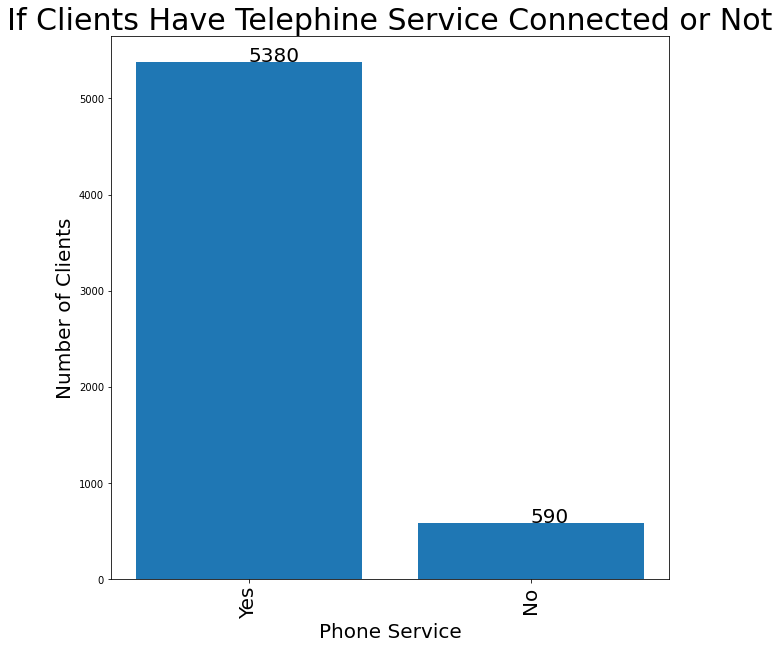

In [54]:
# Here we will see how many clients have their telephone service connected
vis_cat(df["PhoneService"], 10)
plt.xticks(fontsize= 20)
plt.xlabel("Phone Service", fontsize = 20)
plt.ylabel("Number of Clients", fontsize = 20)
plt.title("If Clients Have Telephine Service Connected or Not", fontsize = 30)
plt.show()

#### We see that most of the clients in our dataset have their telephone service connected

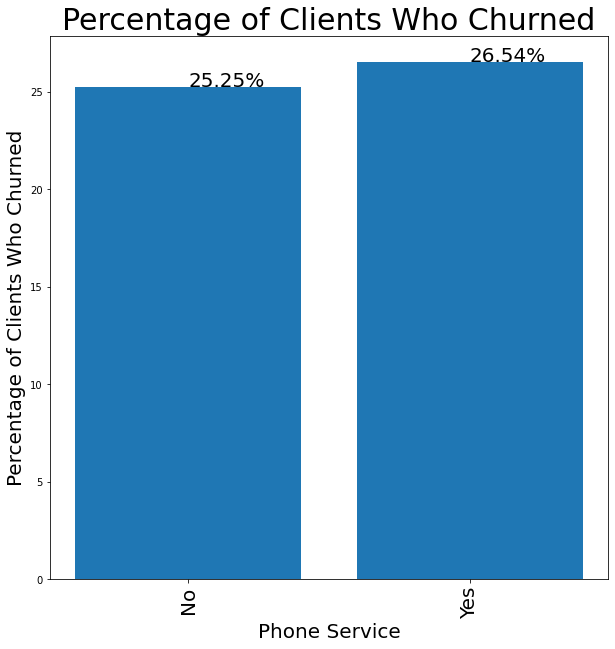

In [55]:
# Now we will see percentage of clients from the above categories who churned
vis_perc(df["PhoneService"], "PhoneService", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.xlabel("Phone Service", fontsize = 20)
plt.ylabel("Percentage of Clients Who Churned", fontsize = 20)
plt.title("Percentage of Clients Who Churned", fontsize = 30)
plt.show()

#### We see from the above graph that there is not much difference in the churn rate of the clients having phone service and those who arent having phone service

### Important Observations from PhoneService
1. Most of the clients in our dataset have their telephone service connected
2. There is not much difference in the churn rate of the clients having phone service and those who arent having phone service


## MultipleLines

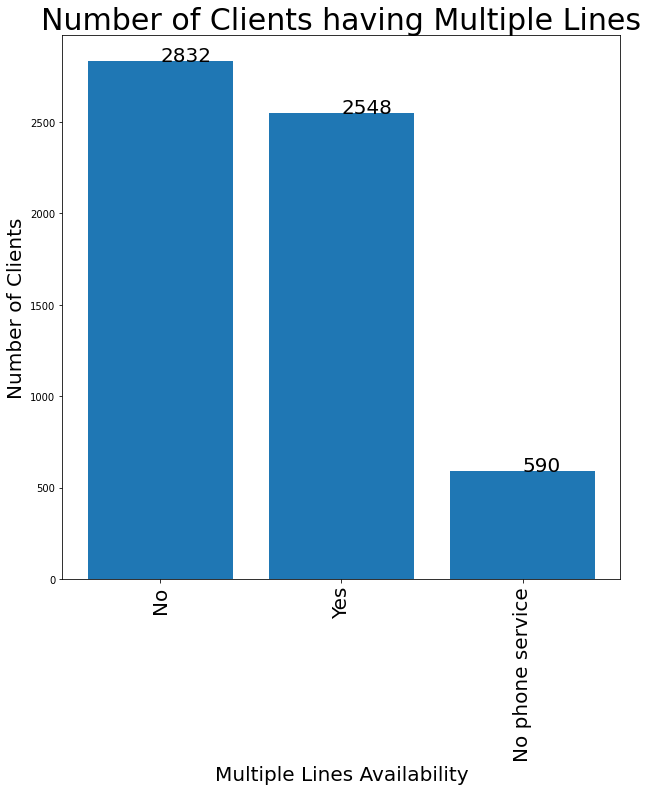

In [56]:
# Now we will see how many clients are there [pertaining to each category of this variable in our dataset
vis_cat(df["MultipleLines"], 10)
plt.xticks(fontsize = 20)
plt.xlabel("Multiple Lines Availability", fontsize= 20)
plt.ylabel("Number of Clients", fontsize = 20)
plt.title("Number of Clients having Multiple Lines", fontsize= 30)
plt.show()

#### Thus we see that number of clients having and not having Multiple Lines in our dataset are almost equal while there are very less number of people with No phone service


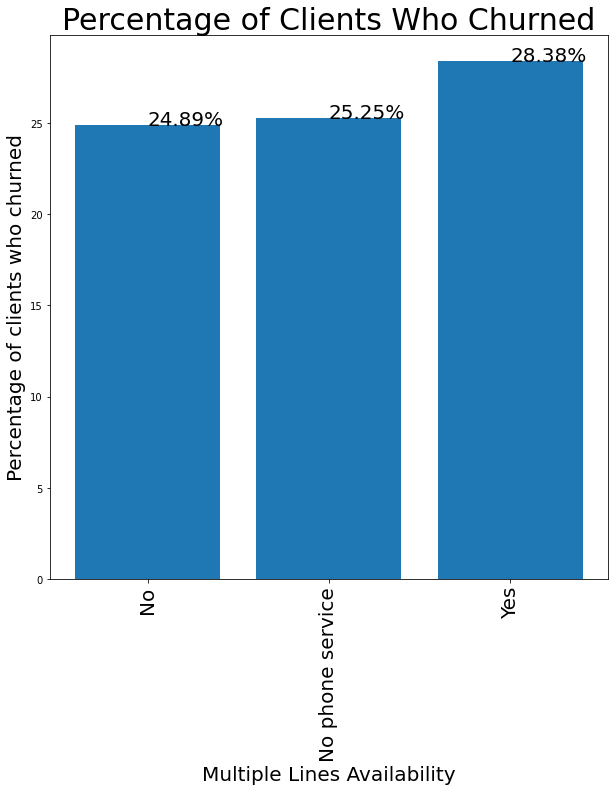

In [57]:
# Now we will see what percentage of clients of every category churned
vis_perc(df["MultipleLines"], "MultipleLines", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.xlabel("Multiple Lines Availability", fontsize = 20)
plt.ylabel("Percentage of clients who churned", fontsize = 20)
plt.title("Percentage of Clients Who Churned", fontsize = 30)
plt.show()

#### Churn rate among the three categories is more or less the same but the highest churn rate is among the people having multiple lines.

#### This result seems forseeable because people having multiple lines are more likely to switch


### Important Observations Form MultipleLines
1. Number of clients having and not having Multiple Lines in our dataset are almost equal while there are very less number of people with No phone service
2. Churn rate among the three categories is more or less the same but the highest churn rate is among the people having multiple lines.


## InternetService

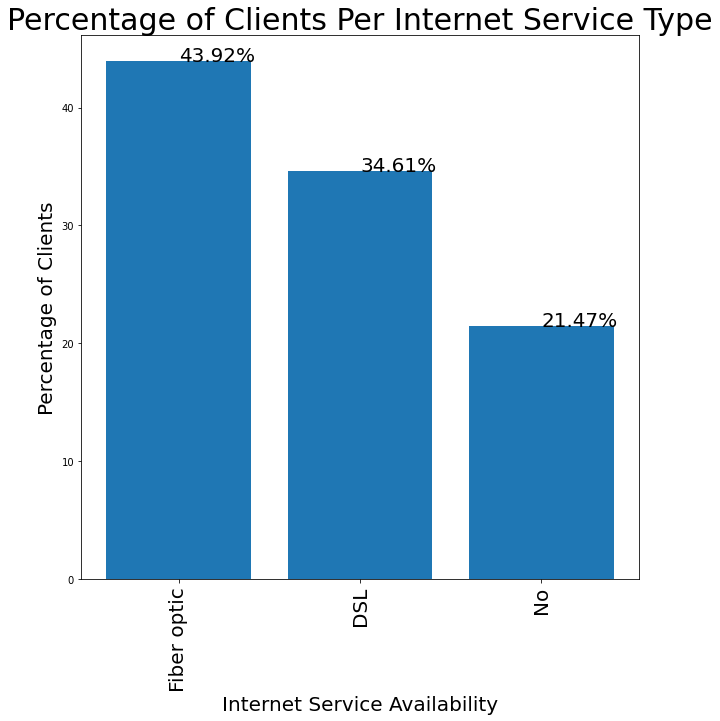

In [58]:
# Now we will see how clients in our dataset get their internet service
vis_cat_perc(df["InternetService"], 10)
plt.xticks(fontsize = 20)
plt.xlabel("Internet Service Availability", fontsize = 20)
plt.ylabel("Percentage of Clients", fontsize = 20)
plt.title("Percentage of Clients Per Internet Service Type", fontsize = 30)
plt.show()

#### About 44% clients get their internet service from Fiber Optic, about 35% clients get their internet service from DSL and around 22% clients have no internet service

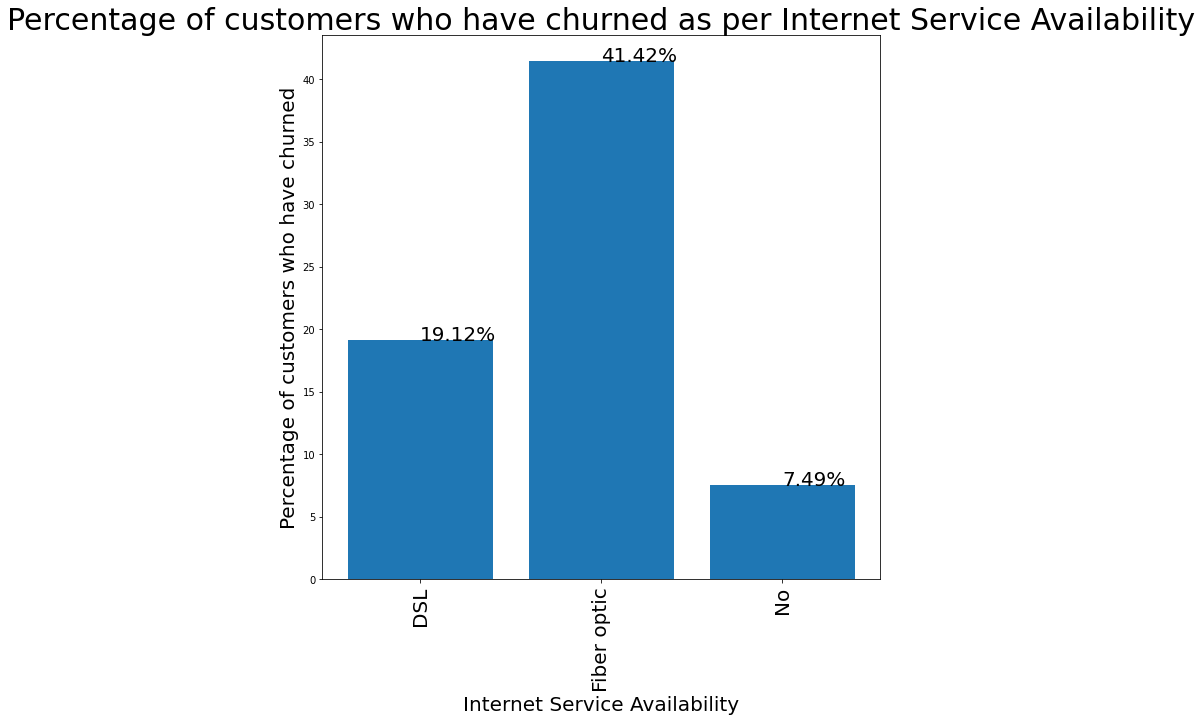

In [59]:
# Now we will see what percentage of clients have churned per Internet Service Availability category
vis_perc(df["InternetService"], "InternetService", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.xlabel("Internet Service Availability", fontsize = 20)
plt.ylabel("Percentage of customers who have churned", fontsize = 20)
plt.title("Percentage of customers who have churned as per Internet Service Availability", fontsize = 30)
plt.show()

#### Customers who get their internet service from fiber optic have churned the most followed by DSL followed by clients having no internet service
#### This is understandable in the way that fiber optics are the latest technology so clients must be trying different brands with it.

### Important Observations from InternetService
1. About 44% clients get their internet service from Fiber Optic, about 35% clients get their internet service from DSL and around 22% clients have no internet service.

2. Customers who get their internet service from fiber optic have churned the most followed by DSL followed by clients having no internet service

## OnlineSecurity

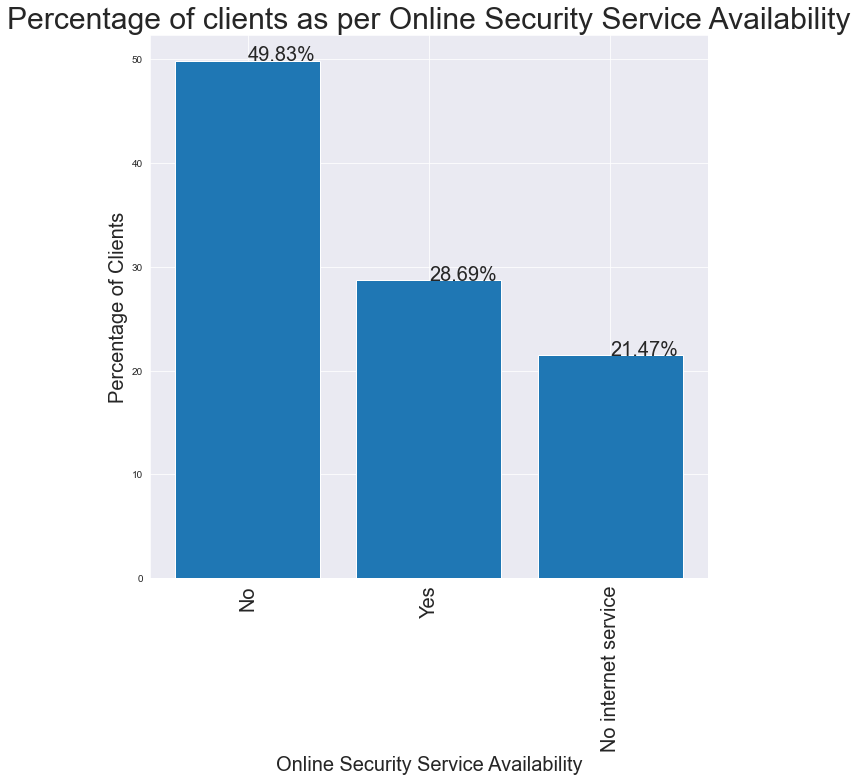

In [60]:
# Now we will see how many clients have their online security service connected
sns.set_style("darkgrid")
vis_cat_perc(df["OnlineSecurity"], 10)
plt.xticks(fontsize = 20)
plt.xlabel("Online Security Service Availability", fontsize = 20)
plt.ylabel("Percentage of Clients", fontsize = 20)
plt.title("Percentage of clients as per Online Security Service Availability", fontsize = 30)
plt.show()


#### About 50% of clients from our dataset have no online security service, about 25% have online security service and about 25% of clients have no internet service

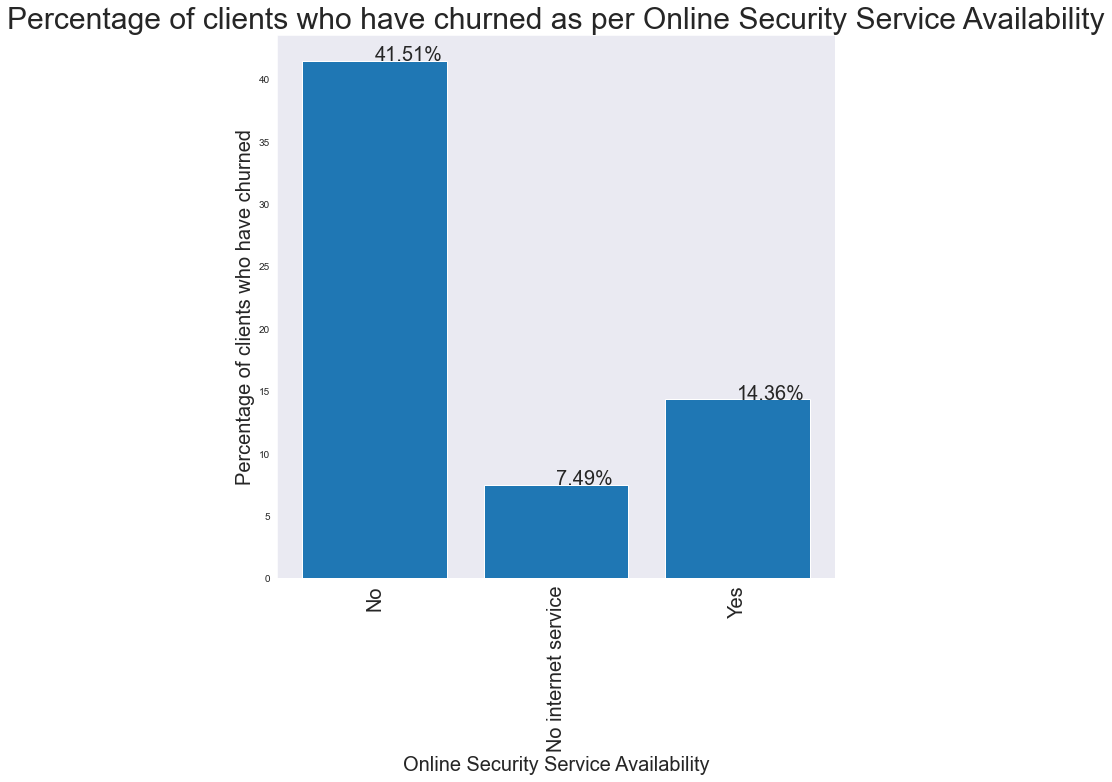

In [61]:
# Now we will see what percentage of clients have churned as per Online Security Service Availability
sns.set_style("dark")
vis_perc(df["OnlineSecurity"], "OnlineSecurity", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.xlabel("Online Security Service Availability", fontsize = 20)
plt.ylabel("Percentage of clients who have churned", fontsize = 20)
plt.title("Percentage of clients who have churned as per Online Security Service Availability", fontsize = 30)
plt.show()

#### Around 41% of people having No online security service have churned, around 14% of people having internet security have churned and around 8% of people having No Internet Service have churned
#### Most of the people having No online security service have churned. This is possible because people having online security with a particular brand will not shift easily to another

### Important Observations from OnlineSecurity
1. About 50% of clients from our dataset have no online security service, about 25% have online security service and about 25% of clients have no internet service.
2. Around 41% of people having No online security service have churned, around 14% of people having internet security have churned and around 8% of people having No Internet Service have churned.

## OnlineBackup

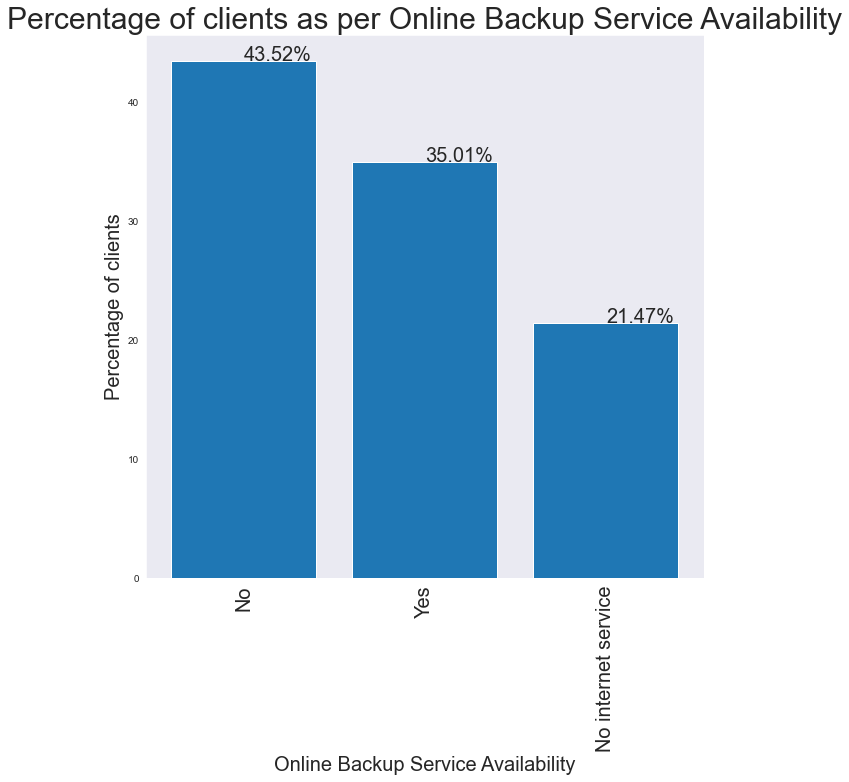

In [62]:
# Percentage of clients in our dataset having online backup
vis_cat_perc(df["OnlineBackup"], 10)
plt.xticks(fontsize = 20)
plt.xlabel("Online Backup Service Availability", fontsize = 20)
plt.ylabel("Percentage of clients", fontsize = 20)
plt.title("Percentage of clients as per Online Backup Service Availability", fontsize = 30)
plt.show()

#### Most of the clients in our dataset ie. around 44% do not have online backupo service activated, around 35% clients have online backup service activated and around 21% of clients have no internet service

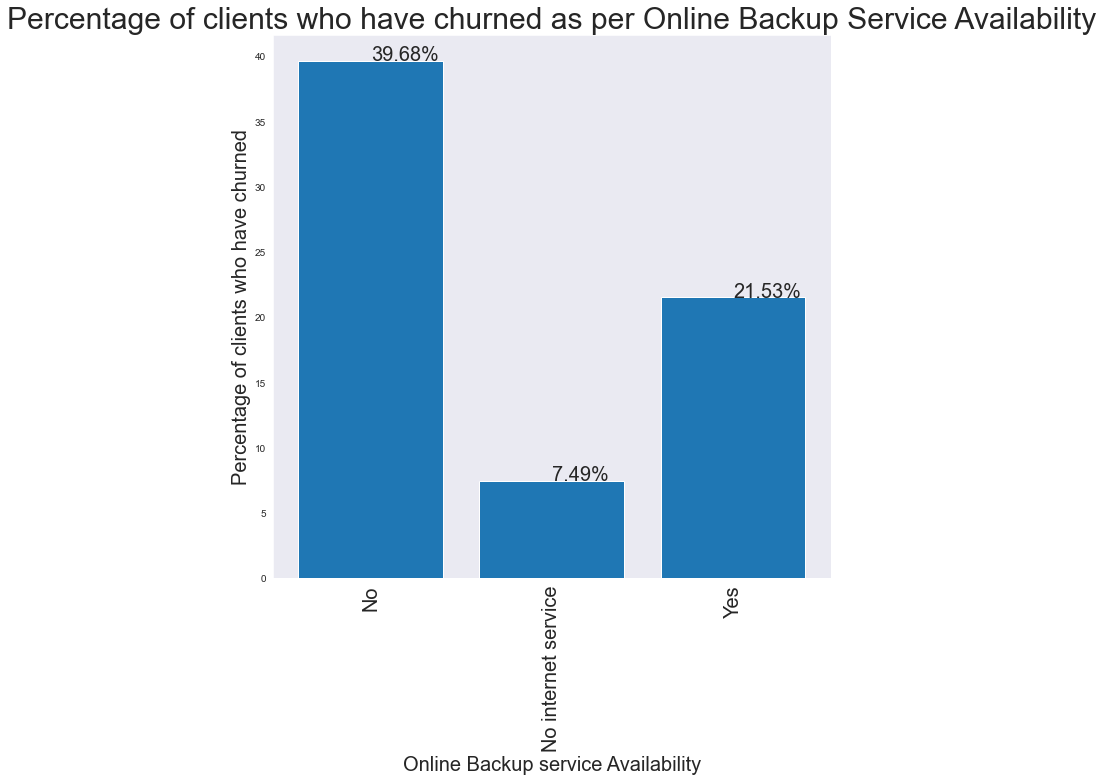

In [63]:
# Now we will see what percentage of clients have churned in each category of online backup service availability
vis_perc(df["OnlineBackup"], "OnlineBackup", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.xlabel("Online Backup service Availability", fontsize = 20)
plt.ylabel("Percentage of clients who have churned", fontsize = 20)
plt.title("Percentage of clients who have churned as per Online Backup Service Availability", fontsize = 30)
plt.show()

#### Here also scenarios are somewhat similar to online security service
#### Around 40% of people not having online backup service availability have churned, around 22% having online backup service have churned and about 8% of people having no internet service have churned.

#### Over the different scenarios we see that people having no internet service have churned the least. A probable reason for this may be that they do not have much reason to switch the brands

#### People having no online backup service have churned the most. This might be because people having online backup service with a particular brand are less likely to discontinue using the services of that brand.

## DeviceProtection

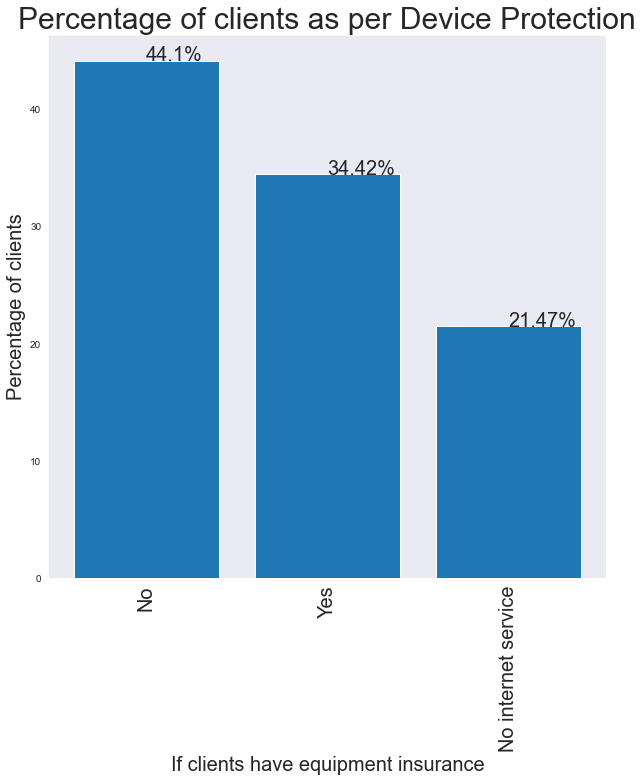

In [64]:
# Now we will see what percentage of clients in our dataset have equipment insurance
vis_cat_perc(df["DeviceProtection"], 10)
plt.xticks(fontsize = 20)
plt.xlabel("If clients have equipment insurance", fontsize = 20)
plt.ylabel("Percentage of clients", fontsize = 20)
plt.title("Percentage of clients as per Device Protection", fontsize = 30)
plt.show()


#### Around 44% clients do not have equipment insurance, around 34% clients have equipment insurance and around 21% of clients have no internet service

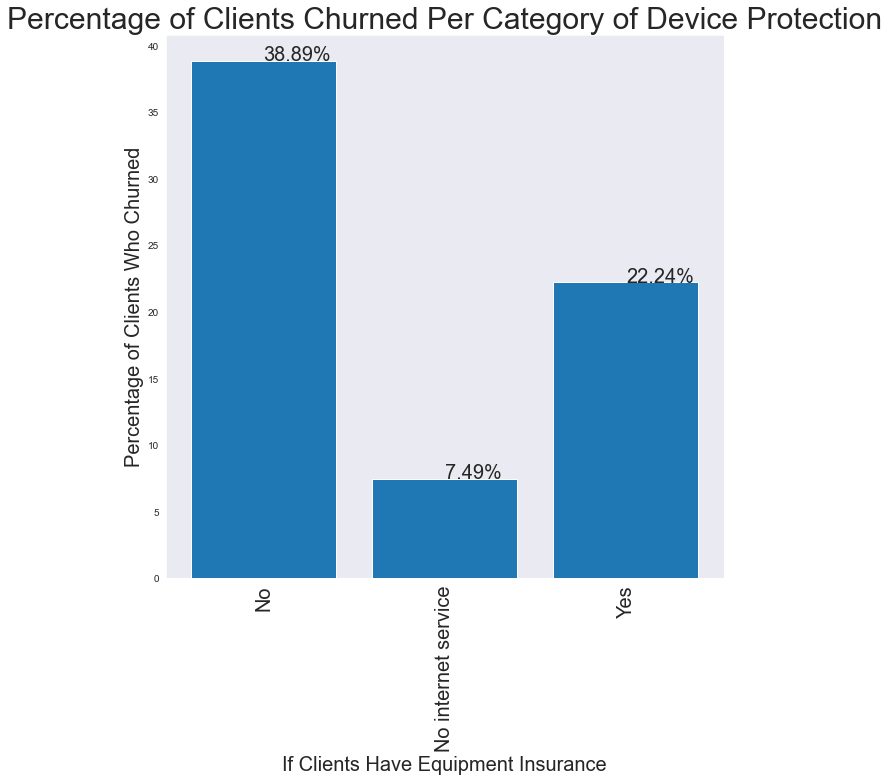

In [65]:
# Now we will see what percentage of clients in different categories have churned
vis_perc(df["DeviceProtection"], "DeviceProtection", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.xlabel("If Clients Have Equipment Insurance", fontsize = 20)
plt.ylabel("Percentage of Clients Who Churned", fontsize = 20)
plt.title("Percentage of Clients Churned Per Category of Device Protection", fontsize = 30)
plt.show()

#### We see here that around 39% clients having no Device Protection have churned, around 22% of clients having Device Protection have churned and around 7% of clients having No internet service have churned

#### This seems intuitive because clients having Device Protection with a perticular brand are less likely to discontinue their service

### Impertant Observation from DeviceProtection
1. Around 44% clients do not have equipment insurance, around 34% clients have equipment insurance and around 21% of clients have no internet service
2. We see here that around 39% clients having no Device Protection have churned, around 22% of clients having Device Protection have churned and around 7% of clients having No internet service have churned

## TechSupport 


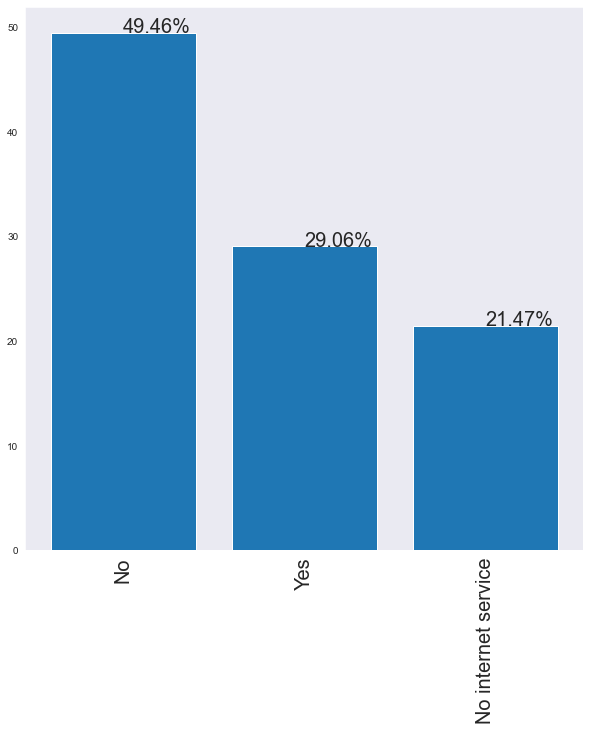

In [66]:
# Now we will see what percentage of our clients belong to each category of the variable
vis_cat_perc(df["TechSupport"], 10)
plt.xticks(fontsize = 20)
plt.show()

#### We see here that around 50% of clients dont have Tech Support Service connected, around 29% clients have Tech Support Service connected and around 21% of clients have no internet service

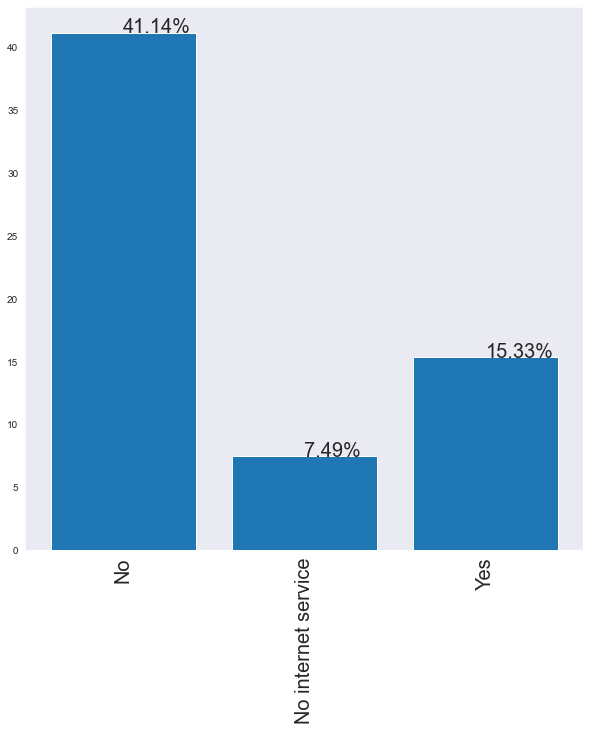

In [67]:
# Now we will see what percentage of clients in each category have churned
vis_perc(df["TechSupport"], "TechSupport", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.show()

#### We see that around 41% of clients having No TechSupport Service have churned , around 15% of clients having TechSupport Service have churned and around 7% of clients having no internet service have churned.

#### This seems intuitive as clients having TechSupport service with a particular brand are less likely to discontinue using the services of that brand.

### Important Observations from TechSupport
1. We see here that around 50% of clients dont have Tech Support Service connected, around 29% clients have Tech Support Service connected and around 21% of clients have no internet service
2. We see that around 41% of clients having No TechSupport Service have churned , around 15% of clients having TechSupport Service have churned and around 7% of clients having no internet service have churned.

## StreamingTV

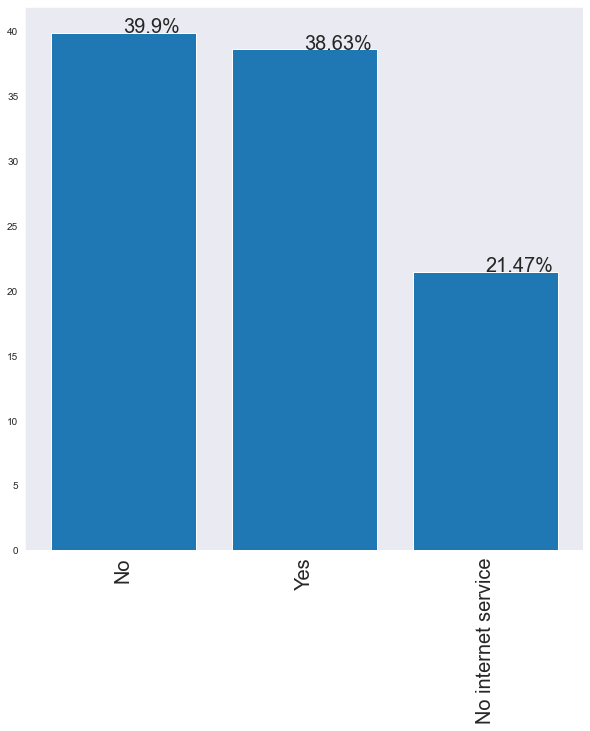

In [68]:
# Now we will see what percentage of clients in our dataset belong to each category of the variable
vis_cat_perc(df["StreamingTV"], 10)
plt.xticks(fontsize= 20)
plt.show()

#### We see that percentage of clients having and not having StreamingTV service are almost the same i.e. 39% and around 21% of clients do not have internet service connected

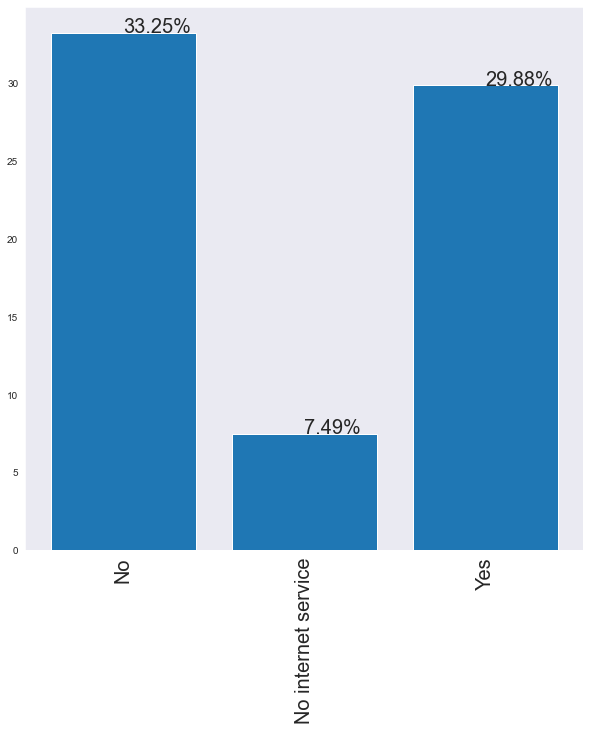

In [69]:
# Now we will see what percentage of clients in each category have churned
vis_perc(df["StreamingTV"], "StreamingTV", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.show()

#### We see that around 33% of clients not having StreamingTV service connected have churned, around 30% of clients having StreamingTV service connected have churned and around 7% of clients having no internet service have churned

### Important Observations from StreamingTV
1. We see that percentage of clients having and not having StreamingTV service are almost the same i.e. 39% and around 21% of clients do not have internet service connected
2. We see that around 33%of clients not having StreamingTV service connected have churned, around 30% of clients having StreamingTV service connected have churned and around 7% of clients having no internet service have churned


## StreamingMovies

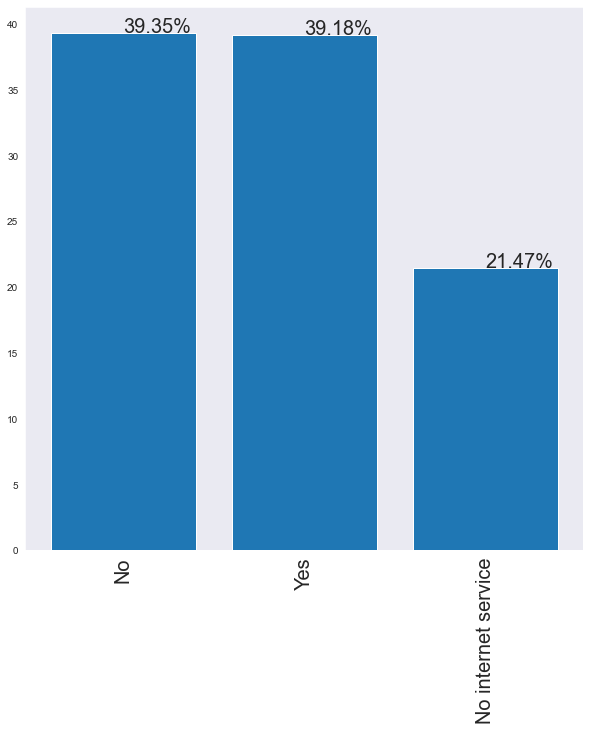

In [70]:
# Now we will see what percentage of clients in our dataset belong to each category of this variable
vis_cat_perc(df["StreamingMovies"], 10)
plt.xticks(fontsize = 20)
plt.show()

#### We see that percentage of clients having and not having StreamingMovies service are same i.e. around 39% and around 21% of clients do not have internet services activated

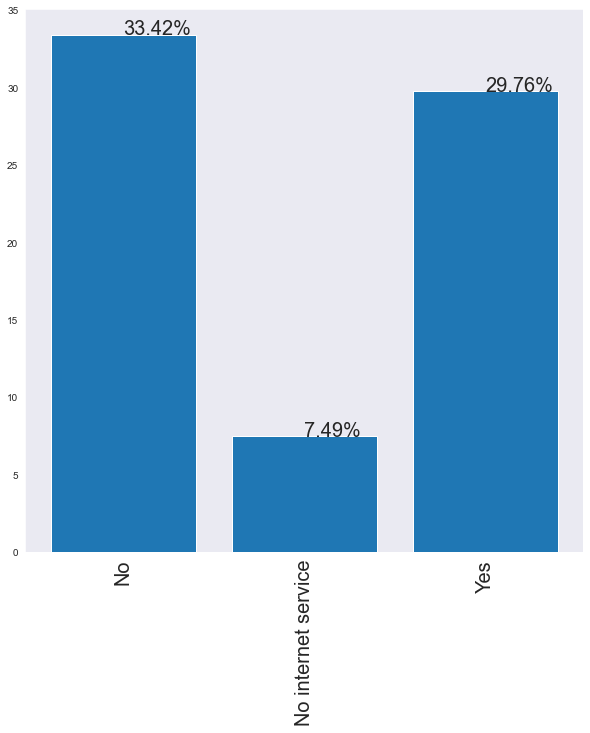

In [71]:
# Now we will see what percentage of clients in each category have churned
vis_perc(df["StreamingMovies"], "StreamingMovies", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.show()

#### We see that around 33% of clients Not having StreamingMovies service have churned, around 30% of clients having StreamingMovies service have churned and around 7% of clients having No internet service have churned

### Important Observations from StreamingMovies
1. We see that percentage of clients having and not having StreamingMovies service are same i.e. around 39% and around 21% of clients do not have internet services activated
2. We see that around 33% of clients Not having StreamingMovies service have churned, around 30% of clients having StreamingMovies service have churned and around 7% of clients having No internet service have churned


## Contract

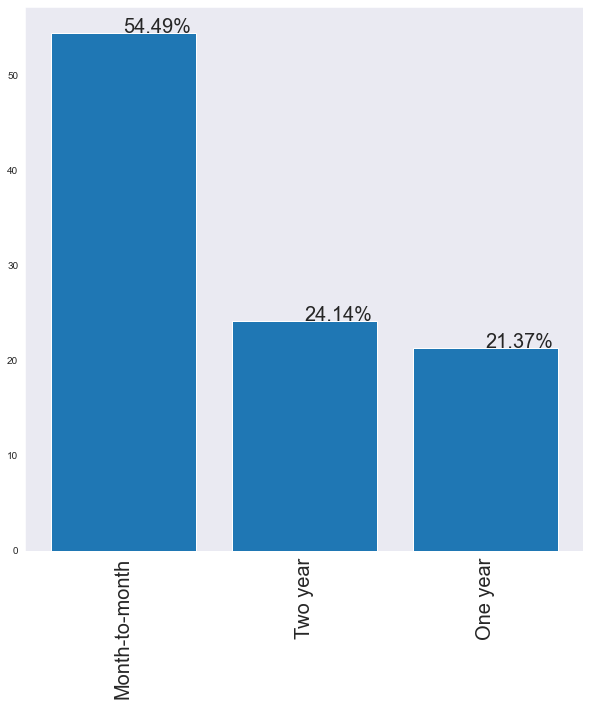

In [72]:
# Now we will see what percentage of clients in our dataset belong to each category of the variable
vis_cat_perc(df["Contract"], 10)
plt.xticks(fontsize = 20)
plt.show()

#### Around 55% of clients have Month-to-month contract, around 21% of the cients have One year contract and around 24% of the clients have Two year contract  

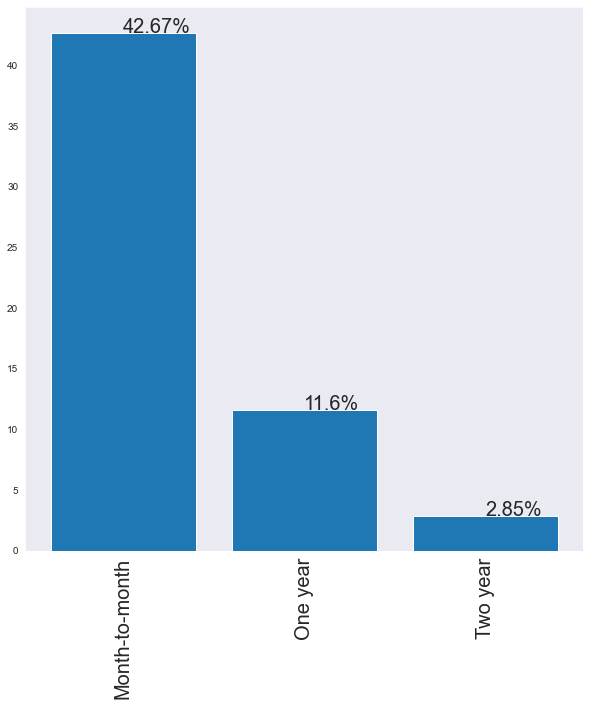

In [73]:
# Now we will see what percentage of clients in each category have churned
vis_perc(df["Contract"], "Contract", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.show()

#### We see here that from clients having Month-to-month contract 43% have churned, from clients having One year contract , around 12% have churned and from clients having Two year contract around 3% have churned

#### This is intuitive because clients having longer term contract with the brand trust the brand more and are less likely to discontinue using the services of that brand.

### Important Observations from Contract
1. Around 55% of clients have Month-to-month contract, around 21% of the cients have One year contract and around 24% of the clients have Two year contract.
2. We see here that from clients having Month-to-month contract 43% have churned, from clients having One year contract , around 12% have churned and from clients having Two year contract around 3% have churned.

## PaperlessBilling

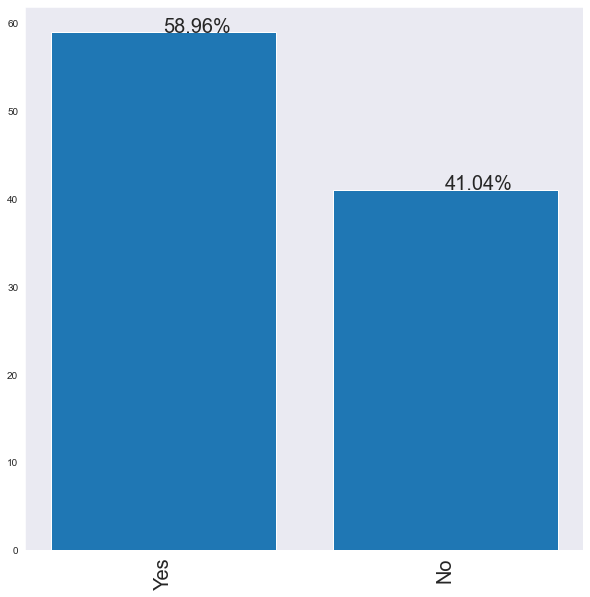

In [74]:
# Now we will see what percentage of clients in our dataset belong to each category of the variable
vis_cat_perc(df["PaperlessBilling"], 10)
plt.xticks(fontsize = 20)
plt.show()

#### Around 59% of clients in our dataset have paperless billing and around 41% of clients do not have paperless billiing

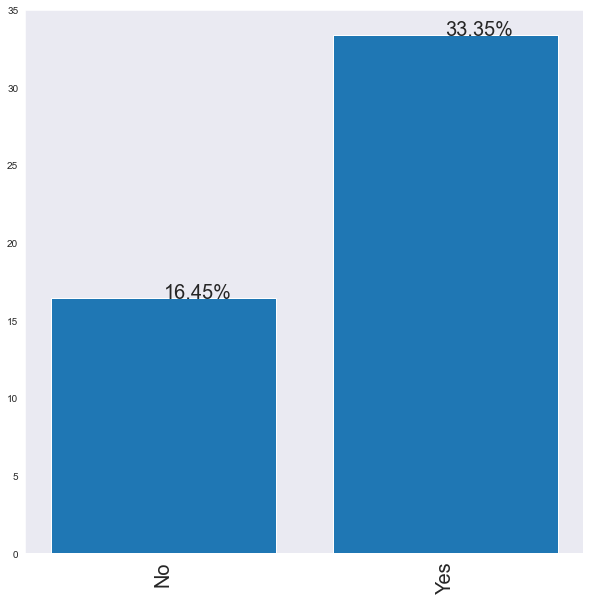

In [75]:
# Now we will see what percentage of clients in each category have churned
vis_perc(df["PaperlessBilling"], "PaperlessBilling", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.show()

#### We see that around 16% of clients not having paperless Billing have churned and around 33% of clients having Paperless billing have churned.

#### One probable reason for the above result might be that users using paperless billing are more connected to the technology and internet and are better informed so they are able to compare different brands and hence more likely to switch the brands

### Important Observations from PaperlessBilling
1. Around 59% of clients in our dataset have paperless billing and around 41% of clients do not have paperless billiing
2. We see that around 16% of clients not having paperless Billing have churned and around 33% of clients having Paperless billing have churned.

## PaymentMethod

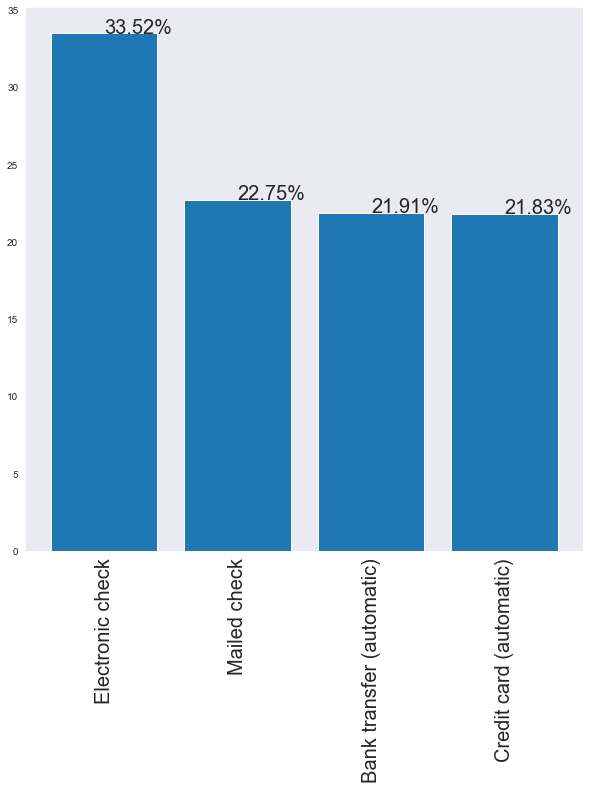

In [76]:
# Now we will see what percentage of clients in our dataset belonf to each category of the variable
vis_cat_perc(df["PaymentMethod"], 10)
plt.xticks(fontsize = 20)
plt.show()

#### We see that most clients are using Electronic Check as the payment method i.e. around 34% and clients using Mailed Check, Bank Transfer and Credit card are almost the same i.e. 22%

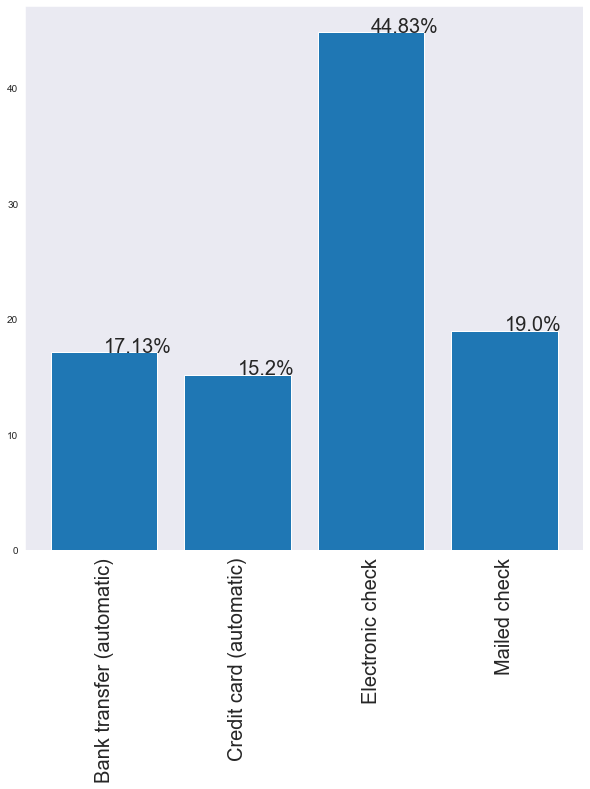

In [77]:
# Now we will see what percentage of clients in each category have churned
vis_perc(df["PaymentMethod"], "PaymentMethod", "Churn_n", 10)
plt.xticks(fontsize = 20)
plt.show()

#### We see that percentage of clients using Electronic check have churned the most i.e. around 48% and percentage of clients using Credit card, Bank transfers and Mailed check have churned almost at the same rate i.e. around 15%, 17% and 19% respectively.

### Important Observations from PaymentMethod
1. We see that most clients are using Electronic Check as the payment method i.e. around 34% and clients using Mailed Check, Bank Transfer and Credit card are almost the same i.e. 22%
2. We see that percentage of clients using Electronic check have churned the most i.e. around 48% and percentage of clients using Credit card, Bank transfers and Mailed check have churned almost at the same rate i.e. around 15%, 17% and 19% respectively.

## MonthlyCharges

In [78]:
# First of all we will remove the outliers from the variable
np.percentile(df["MonthlyCharges"], range(1,101))

array([ 19.1845,  19.35  ,  19.4535,  19.55  ,  19.65  ,  19.75  ,
        19.85  ,  19.9   ,  20.    ,  20.05  ,  20.15  ,  20.25  ,
        20.35  ,  20.5   ,  20.65  ,  20.9   ,  24.0365,  24.45  ,
        24.85  ,  25.1   ,  25.35  ,  25.75  ,  29.6435,  33.656 ,
        35.75  ,  39.947 ,  43.6815,  44.6   ,  45.15  ,  45.85  ,
        48.95  ,  49.65  ,  50.2   ,  50.8   ,  53.1075,  54.25  ,
        54.7765,  55.35  ,  56.2   ,  58.68  ,  59.8   ,  60.7   ,
        62.6005,  64.65  ,  65.55  ,  67.45  ,  69.1   ,  69.656 ,
        70.1   ,  70.45  ,  71.    ,  72.9   ,  73.9285,  74.4   ,
        74.85  ,  75.2   ,  75.65  ,  76.501 ,  78.5355,  79.2   ,
        79.6545,  80.1   ,  80.5   ,  80.85  ,  81.55  ,  83.277 ,
        84.3   ,  84.7   ,  85.2   ,  85.615 ,  86.25  ,  87.384 ,
        89.05  ,  89.5   ,  89.9375,  90.45  ,  91.05  ,  92.441 ,
        93.85  ,  94.36  ,  94.8   ,  95.279 ,  96.    ,  97.344 ,
        98.7   ,  99.4   , 100.    , 100.5   , 101.25  , 102.9

#### We do not see a need of removing any outliers in here

<AxesSubplot:ylabel='MonthlyCharges'>

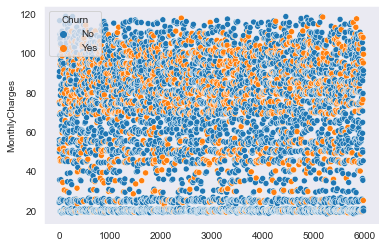

In [79]:
# Now we will see relation of monthly charges with the customer churn
sns.scatterplot(x= df.index, y= df["MonthlyCharges"], hue = df["Churn"])


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

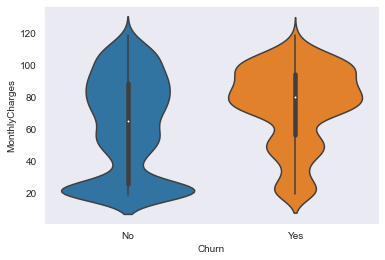

In [80]:
sns.violinplot(x = df["Churn"], y = df["MonthlyCharges"])

#### We clearly see here that churn is more amongst the clients paying higher monthly charges.
#### A probable reason of this might be that clients paying higher monthly charges compare more brands for better services also they might be better informed


### Important Observations from MonthlyCharges
1. We clearly see here that churn is more amongst the clients paying higher monthly charges.

## TotalCharges

In [81]:
# We will first of all change the datatype of TotalCharges column
df["TotalCharges"] = df["TotalCharges"].astype('float')

In [82]:
# First of all we will remove outliers from the variable
np.percentile(df["TotalCharges"], range(1,101))

array([  19.9   ,   21.019 ,   35.8535,   45.088 ,   50.15  ,   58.021 ,
         69.65  ,   73.832 ,   79.1105,   85.145 ,   95.5385,  113.392 ,
        134.597 ,  152.865 ,  168.6175,  189.47  ,  211.626 ,  228.505 ,
        250.177 ,  272.32  ,  298.399 ,  321.777 ,  346.161 ,  374.668 ,
        407.35  ,  434.988 ,  466.267 ,  493.4   ,  524.505 ,  554.19  ,
        592.806 ,  633.482 ,  672.893 ,  711.923 ,  755.515 ,  791.742 ,
        830.4885,  866.411 ,  913.183 ,  950.53  , 1007.161 , 1050.467 ,
       1094.0365, 1134.026 , 1183.24  , 1231.603 , 1271.9075, 1321.45  ,
       1375.1025, 1413.6   , 1460.907 , 1514.7   , 1579.928 , 1644.304 ,
       1712.89  , 1776.216 , 1835.0655, 1901.001 , 1992.921 , 2079.41  ,
       2186.4675, 2276.763 , 2385.419 , 2483.122 , 2588.7625, 2683.821 ,
       2830.979 , 2947.896 , 3045.994 , 3163.535 , 3275.142 , 3438.52  ,
       3562.1305, 3692.946 , 3847.9   , 3979.288 , 4104.3355, 4224.385 ,
       4369.613 , 4517.7   , 4664.0675, 4805.503 , 

In [83]:
df["TotalCharges"][df["TotalCharges"]>= 8058] = 8058

<ipython-input-83-c49ad94fc4e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"][df["TotalCharges"]>= 8058] = 8058


In [84]:
np.percentile(df["TotalCharges"], range(1,101))

array([  19.9   ,   21.019 ,   35.8535,   45.088 ,   50.15  ,   58.021 ,
         69.65  ,   73.832 ,   79.1105,   85.145 ,   95.5385,  113.392 ,
        134.597 ,  152.865 ,  168.6175,  189.47  ,  211.626 ,  228.505 ,
        250.177 ,  272.32  ,  298.399 ,  321.777 ,  346.161 ,  374.668 ,
        407.35  ,  434.988 ,  466.267 ,  493.4   ,  524.505 ,  554.19  ,
        592.806 ,  633.482 ,  672.893 ,  711.923 ,  755.515 ,  791.742 ,
        830.4885,  866.411 ,  913.183 ,  950.53  , 1007.161 , 1050.467 ,
       1094.0365, 1134.026 , 1183.24  , 1231.603 , 1271.9075, 1321.45  ,
       1375.1025, 1413.6   , 1460.907 , 1514.7   , 1579.928 , 1644.304 ,
       1712.89  , 1776.216 , 1835.0655, 1901.001 , 1992.921 , 2079.41  ,
       2186.4675, 2276.763 , 2385.419 , 2483.122 , 2588.7625, 2683.821 ,
       2830.979 , 2947.896 , 3045.994 , 3163.535 , 3275.142 , 3438.52  ,
       3562.1305, 3692.946 , 3847.9   , 3979.288 , 4104.3355, 4224.385 ,
       4369.613 , 4517.7   , 4664.0675, 4805.503 , 

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

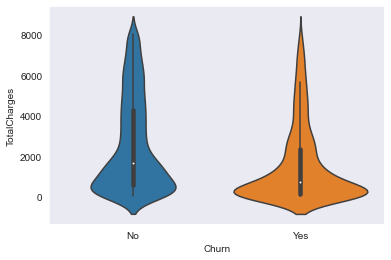

In [85]:
sns.violinplot(x = df["Churn"],  y= df["TotalCharges"])

#### We see here that churn is more among the people who have paid less total charges.
#### This is intuitive because the people who have paid more total charges for a particular brand have been longer term customers for that brand and they are less likely to discontinue using the services of that brand.

### Important Observations from TotalCharges
1. We see here that churn is more among the people who have paid less total charges.

## Churn

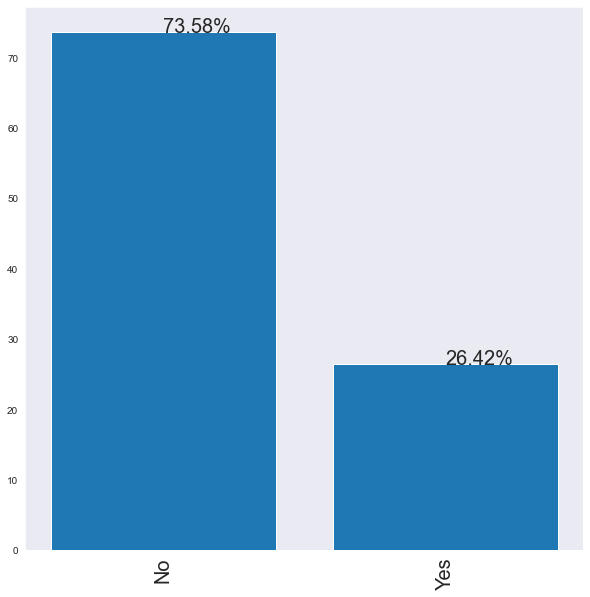

In [86]:
# Now we will see what percentage of clients in our dataset belong to each category of the variable
vis_cat_perc(df["Churn"], 10)
plt.xticks(fontsize = 20)
plt.show()

#### We see here that around 74% of clients in our dataset have not churned while around 26% of clients have churned

### Important Observations from Churn
1. We see here that around 74% of clients in our dataset have not churned while around 26% of clients have churned

# Scaling the Numeric Variables

In [87]:
# Now we will go on to scale our numeric variables


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5970 non-null   object 
 1   SeniorCitizen     5970 non-null   object 
 2   Partner           5970 non-null   object 
 3   Dependents        5970 non-null   object 
 4   tenure            5970 non-null   int64  
 5   PhoneService      5970 non-null   object 
 6   MultipleLines     5970 non-null   object 
 7   InternetService   5970 non-null   object 
 8   OnlineSecurity    5970 non-null   object 
 9   OnlineBackup      5970 non-null   object 
 10  DeviceProtection  5970 non-null   object 
 11  TechSupport       5970 non-null   object 
 12  StreamingTV       5970 non-null   object 
 13  StreamingMovies   5970 non-null   object 
 14  Contract          5970 non-null   object 
 15  PaperlessBilling  5970 non-null   object 
 16  PaymentMethod     5970 non-null   object 


In [89]:
df_n = df.select_dtypes(["int64", "float64"])

In [90]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 5985
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          5970 non-null   int64  
 1   MonthlyCharges  5970 non-null   float64
 2   TotalCharges    5970 non-null   float64
 3   Churn_n         5970 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 393.2 KB


In [91]:
df_n.drop(columns = ["Churn_n"], inplace=True)

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 5985
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          5970 non-null   int64  
 1   MonthlyCharges  5970 non-null   float64
 2   TotalCharges    5970 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 346.6 KB


In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler()

In [95]:
sc = scaler.fit_transform(df_n)

In [96]:
names = df_n.columns

In [97]:
df_sc = pd.DataFrame(data = sc, columns=names)

In [98]:
df_sc.head()

,tenure,MonthlyCharges,TotalCharges
0,1.000000,0.058209,0.213435
1,0.611111,0.695522,0.491890
2,0.527778,0.564179,0.354643
3,0.055556,0.374627,0.027329
4,0.027778,0.350249,0.012526


# Creating Dummy Variables from Nominal Categorical Variables

In [99]:
df_d = df.select_dtypes("object")

In [100]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 5985
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            5970 non-null   object
 1   SeniorCitizen     5970 non-null   object
 2   Partner           5970 non-null   object
 3   Dependents        5970 non-null   object
 4   PhoneService      5970 non-null   object
 5   MultipleLines     5970 non-null   object
 6   InternetService   5970 non-null   object
 7   OnlineSecurity    5970 non-null   object
 8   OnlineBackup      5970 non-null   object
 9   DeviceProtection  5970 non-null   object
 10  TechSupport       5970 non-null   object
 11  StreamingTV       5970 non-null   object
 12  StreamingMovies   5970 non-null   object
 13  Contract          5970 non-null   object
 14  PaperlessBilling  5970 non-null   object
 15  PaymentMethod     5970 non-null   object
 16  Churn             5970 non-null   object
 17  customerID    

In [101]:
df_d.drop(columns = ["customerID"], inplace = True)

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [102]:
df_d = pd.get_dummies(df_d, drop_first=True)

In [103]:
df_d.head()

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [104]:
df_d.shape

(5970, 28)

# Concatenating the dataframes to form a single dataframe for analysis

In [105]:
df_d.reset_index(inplace = True)
df_sc.reset_index(inplace = True)

In [106]:
df = pd.concat([df_d, df_sc], axis = 1)

In [107]:
df.head()

,index,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,index,tenure,MonthlyCharges,TotalCharges
0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1.000000,0.058209,0.213435
1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0.611111,0.695522,0.491890
2,2,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0.527778,0.564179,0.354643
3,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,3,0.055556,0.374627,0.027329
4,4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0.027778,0.350249,0.012526


In [109]:
df.drop(columns = ["index"], inplace = True)

# Now we will calculate corr for multivariate analysis

In [111]:
corr = df.corr()

<AxesSubplot:>

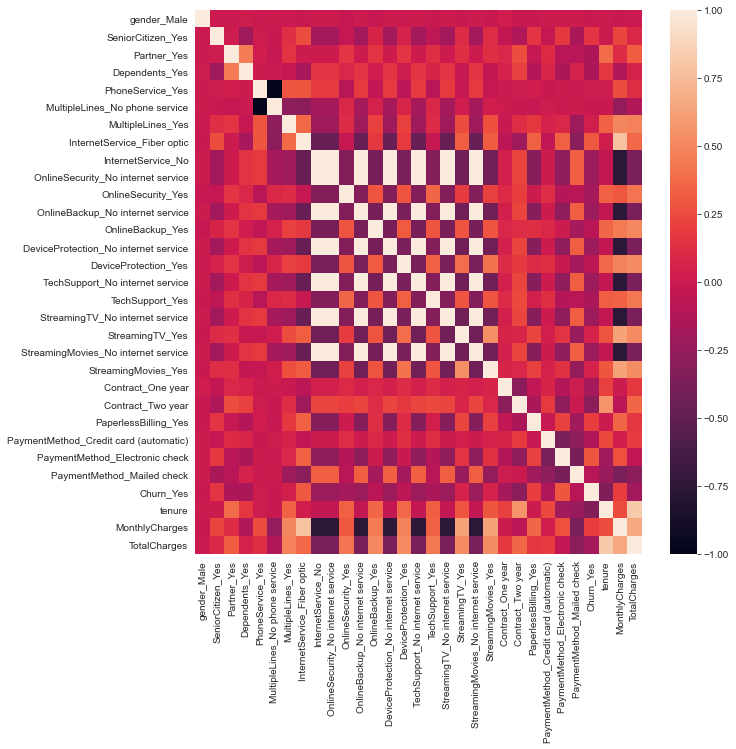

In [112]:
plt.figure(figsize = (10,10))
sns.heatmap(corr)

In [113]:
# corr.to_excel("corr1.xlsx")

# Saving the final Dataframe 

In [110]:
df.to_excel("df1.xlsx")